<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Queen_Linkedin_of_multi_color_chess_board_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

In [6]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
import time
#plt.rcParams["figure.figsize"] = (15,10)

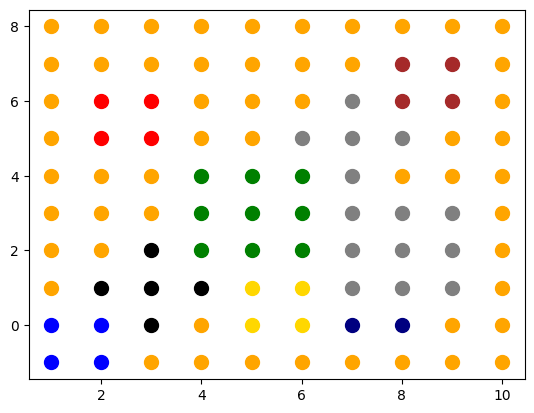

100

In [33]:
dic = {
    (1, 1): 4, (1, 2): 4, (1, 3): 4, (1, 4): 4, (1, 5): 4, (1, 6): 4, (1, 7): 4, (1, 8): 4,
    (2, 1): 4, (2, 2): 5, (2, 3): 4, (2, 4): 4, (2, 5): 4, (2, 6): 1, (2, 7): 1, (2, 8): 4,
    (3, 1): 5, (3, 2): 5, (3, 3): 6, (3, 4): 6, (3, 5): 3, (3, 6): 3, (3, 7): 1, (3, 8): 1,
    (4, 1): 5, (4, 2): 5, (4, 3): 5, (4, 4): 6, (4, 5): 3, (4, 6): 1, (4, 7): 1, (4, 8): 1,
    (5, 1): 5, (5, 2): 8, (5, 3): 5, (5, 4): 7, (5, 5): 2, (5, 6): 1, (5, 7): 1, (5, 8): 1,
    (6, 1): 8, (6, 2): 8, (6, 3): 7, (6, 4): 7, (6, 5): 2, (6, 6): 2, (6, 7): 2, (6, 8): 1,
    (7, 1): 8, (7, 2): 8, (7, 3): 8, (7, 4): 8, (7, 5): 8, (7, 6): 8, (7, 7): 2, (7, 8): 1,
    (8, 1): 8, (8, 2): 1, (8, 3): 1, (8, 4): 1, (8, 5): 1, (8, 6): 1, (8, 7): 1, (8, 8): 1
}

dic = {
    (0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (0, 8): 0, (0, 9): 0,
    (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 0, (1, 5): 0, (1, 6): 0, (1, 7): 8, (1, 8): 8, (1, 9): 0,
    (2, 0): 0, (2, 1): 1, (2, 2): 1, (2, 3): 0, (2, 4): 0, (2, 5): 0, (2, 6): 7, (2, 7): 8, (2, 8): 8, (2, 9): 0,
    (3, 0): 0, (3, 1): 1, (3, 2): 1, (3, 3): 0, (3, 4): 0, (3, 5): 7, (3, 6): 7, (3, 7): 7, (3, 8): 0, (3, 9): 0,
    (4, 0): 0, (4, 1): 0, (4, 2): 0, (4, 3): 6, (4, 4): 6, (4, 5): 6, (4, 6): 7, (4, 7): 0, (4, 8): 0, (4, 9): 0,
    (5, 0): 0, (5, 1): 0, (5, 2): 0, (5, 3): 6, (5, 4): 6, (5, 5): 6, (5, 6): 9, (5, 7): 9, (5, 8): 9, (5, 9): 0,
    (6, 0): 0, (6, 1): 0, (6, 2): 2, (6, 3): 6, (6, 4): 6, (6, 5): 6, (6, 6): 9, (6, 7): 9, (6, 8): 9, (6, 9): 0,
    (7, 0): 0, (7, 1): 2, (7, 2): 2, (7, 3): 2, (7, 4): 5, (7, 5): 5, (7, 6): 9, (7, 7): 9, (7, 8): 9, (7, 9): 0,
    (8, 0): 3, (8, 1): 3, (8, 2): 2, (8, 3): 0, (8, 4): 5, (8, 5): 5, (8, 6): 4, (8, 7): 4, (8, 8): 0, (8, 9): 0,
    (9, 0): 3, (9, 1): 3, (9, 2): 0, (9, 3): 0, (9, 4): 0, (9, 5): 0, (9, 6): 0, (9, 7): 0, (9, 8): 0, (9, 9): 0
}

KOLORs = ['r','k','b','navy','gold','g','grey','brown','grey','orange']
info = {}
c= 0
for (i,j),v in dic.items():
  x,y = i,j
  plt.scatter(1+y,8-x,s=100, c= KOLORs[v-1])
  c+=1
  info[c] = (1+y,8-x,v)
plt.show()
c

In [34]:
N = len(dic)
info_color = {}
for c,(x,y,v) in info.items():
  info_color[v] = info_color.get(v,[])+[c]
X= {x for (x,y,c) in info.values()}
Y= {y for (x,y,c) in info.values()}

sorted_y = sorted(Y)
X,Y,sorted_y

({1, 2, 3, 4, 5, 6, 7, 8, 9, 10},
 {-1, 0, 1, 2, 3, 4, 5, 6, 7, 8},
 [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [36]:
def dist(i,j):
  return int((info[i][0]-info[j][0])**2+(info[i][1]-info[j][1])**2)
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0
        self.__save_solution = {}



    def on_solution_callback(self):
        self.__solution_count += 1
        #print(self.__solution_count , [self.Value(self.__variables[i]) for i in self.__variables])
        self.__save_solution[self.__solution_count] = {i:self.Value(self.__variables[i]) for i in self.__variables}
        if self.__solution_count == 7:
          self.StopSearch()

    def solution_count(self):
        return self.__solution_count
    def solution_save(self):
        return self.__save_solution


model = cp_model.CpModel()
solver = cp_model.CpSolver()
nodes = range(1,N+1)
colors = range(8)

nmax = int(0.5*N)

U = {(i,c):model.NewBoolVar(f"assign_{i}_{c}") for i in nodes for c in colors}
Z = {(i,j,c):model.NewBoolVar(f"Z_{i}_{j}_{c}") for i in nodes for j in nodes for c in colors if dist(i,j) == 1}
flow = {(i,j,c):model.NewIntVar(0,nmax, f"flow_{i}_{j}_{c}") for i in nodes for j in nodes for c in colors if dist(i,j) == 1}

source = {(i,c):model.NewIntVar(0,nmax,f"source_{i}_{c}") for c in colors for i in nodes}
source_node = {(i,c):model.NewBoolVar(f"sourcenode_{i}_{c}") for c in colors for i in nodes}


for (i,j,c),v in Z.items():
  model.Add(v<=U[i,c])
  model.Add(v<=U[j,c])
  model.Add(flow[i,j,c] <= v*nmax)

  link = [Z[i,j,c],Z[j,i,c]]
  model.AddAtMostOne(link)



for (i,c),v in source.items():
  model.Add(source_node[i,c] <=U[i,c])
  model.Add(v - U[i,c] == cp_model.LinearExpr.Sum([flow[i,j,c]-flow[j,i,c] for j in nodes if (i,j,c) in flow]) )

for i in nodes:
  expressions = [U[i,c] for c in colors]
  model.AddExactlyOne(expressions)

for c in colors:
  expressions = [U[i,c] for i in nodes]
  model.Add(cp_model.LinearExpr.Sum(expressions) >= 2)
  expressions_sn = [source_node[i,c] for i in nodes]
  model.AddExactlyOne(expressions_sn)


for (i,c) in source:
  model.Add(source[i,c]==0).OnlyEnforceIf(source_node[i,c].Not())


for c1 in colors:
  for c2 in colors:
    if c1>c2:
      expressions_c1 = [U[i,c1] for i in nodes]
      expressions_c2 = [U[i,c2] for i in nodes]
      model.Add(cp_model.LinearExpr.Sum(expressions_c1) - cp_model.LinearExpr.Sum(expressions_c2) <=  int(0.2*N) )
      model.Add(cp_model.LinearExpr.Sum(expressions_c1) - cp_model.LinearExpr.Sum(expressions_c2) >= -int(0.2*N) )


minx, maxx = min(X), max(X)
miny, maxy = min(Y), max(Y)

for c in colors:
  expressions_edge = [U[i,c] for i in nodes if info[i][0] in [minx, maxx] or info[i][1] in [miny, maxy] ]
  #model.Add(cp_model.LinearExpr.Sum(expressions_edge)>0)

for x in X:
    expressions_x = [source_node[i,c] for i in nodes for c in colors if info[i][0] == x]
    model.AddAtMostOne(expressions_x)

for y in Y:
    expressions_y = [source_node[i,c] for i in nodes for c in colors if info[i][1] == y]
    model.AddAtMostOne(expressions_y)


for i in nodes:
  part1 = [source_node[i,c] for c in colors]
  part2 = [source_node[j,c] for j in nodes for c in colors if dist(i,j) == 1]

  expressions = part1 + part2
  model.AddAtMostOne(expressions)

solver.parameters.enumerate_all_solutions = False
solution_printer = VarArraySolutionPrinter(U)

expressions_vz = [v for (i,j,c),v in Z.items()]
#model.Minimize(sum(expressions_vz))

st = time.time()
status = solver.Solve(model, solution_printer)

et = time.time()
print(f"time = {et-st}")
print(f"status = {solver.StatusName(status)}")
print(f"Number of solutions found: {solution_printer.solution_count()}")
print("OF = ", solver.ObjectiveValue())

time = 121.31290030479431
status = OPTIMAL
Number of solutions found: 1
OF =  0.0


4 3 sourcxe
23 0 sourcxe
48 7 sourcxe
60 4 sourcxe
61 6 sourcxe
75 1 sourcxe
89 5 sourcxe
92 2 sourcxe


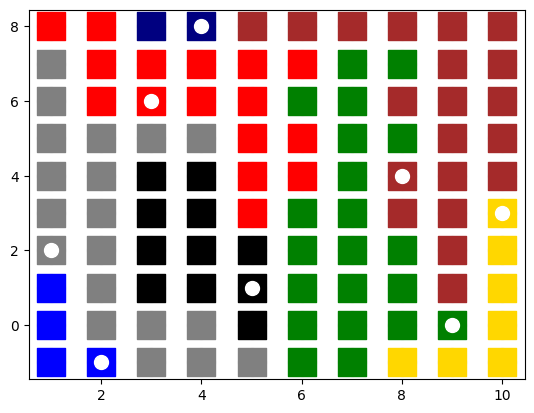

In [37]:
for c,(x,y,v) in info.items():
  plt.scatter(x,y,s=400, c= 'grey', alpha= 0.6)

for i in nodes:
  for c in colors:
    if solver.Value(U[i,c]):
      plt.scatter(info[i][0],info[i][1],s=400, marker='s', c= KOLORs[c])
    if solver.Value(source_node[i,c]):
      plt.scatter(info[i][0],info[i][1],s=100, marker='o', c= 'w', zorder =2)
    if solver.Value(source_node[i,c]):
      print(i,c,'sourcxe')

plt.show()

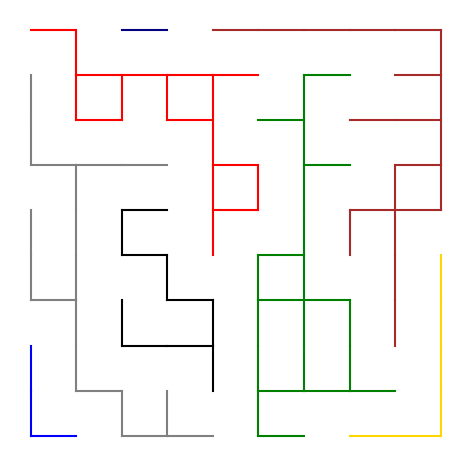

In [38]:
for i , dic in solution_printer.solution_save().items():
  plt.figure(figsize=(5,5))
  for (i,j,c), vz in Z.items():
    if solver.Value(vz):
      plt.plot([info[i][0],info[j][0]],[info[i][1],info[j][1]],c= KOLORs[c])
  plt.tight_layout()
  plt.axis('off')
  plt.show()


In [ ]:
cntu = True
counter =0
while (cntu and counter< 7):

  A= [v.Not() for i,v in U.items() if solver.value(v)==1]
  B= [v for i,v in U.items() if solver.value(v)==0]

  expressions = A+ B
  model.AddAtLeastOne(expressions)
  status = solver.Solve(model,solution_printer)
  #print(status, solver.StatusName(status), solver.ObjectiveValue())
  if status != cp_model.OPTIMAL:
    cntu = False
  else:
    counter+=1
    print(counter)
    #pass
    plt.figure(figsize=(5,5))
    for i , v in U.items():
      #print(i, dic)
      if solver.value(v):
        plt.scatter(info[i][0],info[i][1],s=500, marker = 's', c= 'k')
      else:
        plt.scatter(info[i][0],info[i][1],s=500, marker = 's', c= 'grey', alpha = 0.3)
    plt.tight_layout()
    plt.axis('off')
    plt.show()

    #"""

